# Pokemon Data Analysis
---

This project is part of my "100 Days of Data Projects."


With this Pokemon data, I have two goals:

- **Classification:** Given a Pokemon's features of base stats, experience requirements, catch rate, height, weight, and generation number, could we reliably classify if a Pokemon is a Dragon Type?

- **Regression:** Can we create a regression model that predicts a Pokemon's HP stat?


---


This dataset consists of all Pokemon from the first 8 generations. (All the current Pokemon as of June 2022.)

Source: https://www.kaggle.com/datasets/maca11/all-pokemon-dataset

---
# Objective 1: Classification of Dragon-Types
---

## Step 1: Import Data and Packages

In [1]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

original_data = pd.read_csv("pokemon_data.csv")

original_data.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


### Check columns

In [95]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

### Select Columns and Rows

- Remove unused columns

- Remove Mega Evolutions because their stats may be different

In [2]:
# keep the columns to be used
filtered_data = original_data[["HP", "Att", "Def", "Spa",
                               "Spd", "Spe", "Generation",
                               "Experience type",
                               "Experience to level 100",
                               "Catch Rate", "Height",
                               "Weight", "Type 1", "Type 2"]]

# filter rows
notMega = original_data["Mega Evolution"] == False

filtered_data = filtered_data[notMega]


# Prints ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.info())



filtered_data.shape =  (982, 14)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 1031
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP                       982 non-null    int64  
 1   Att                      982 non-null    int64  
 2   Def                      982 non-null    int64  
 3   Spa                      982 non-null    int64  
 4   Spd                      982 non-null    int64  
 5   Spe                      982 non-null    int64  
 6   Generation               982 non-null    float64
 7   Experience type          982 non-null    object 
 8   Experience to level 100  982 non-null    int64  
 9   Catch Rate               982 non-null    int64  
 10  Height                   982 non-null    float64
 11  Weight                   982 non-null    float64
 12  Type 1                   982 non-null    object 
 13  Type 2                   508 non-null    o

### Create Binary Outcome "isDragon"

In [3]:
# create binary feature isDragon
isDragon1 = filtered_data["Type 1"] == "Dragon"
isDragon2 = filtered_data["Type 2"] == "Dragon"

filtered_data["isDragon"] = isDragon1 | isDragon2

filtered_data["isDragon"] = filtered_data["isDragon"].map({True: 1, False: 0})

# drop column Type 1 and Type 2 as it is no longer needed
filtered_data = filtered_data.drop(["Type 1", "Type 2"], axis=1)

# Prints  ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.head())



filtered_data.shape =  (982, 13)


   HP  Att  Def  Spa  Spd  Spe  Generation Experience type  \
0  45   49   49   65   65   45         1.0     Medium Slow   
1  60   62   63   80   80   60         1.0     Medium Slow   
2  80   82   83  100  100   80         1.0     Medium Slow   
4  39   52   43   60   50   65         1.0     Medium Slow   
5  58   64   58   80   65   80         1.0     Medium Slow   

   Experience to level 100  Catch Rate  Height  Weight  isDragon  
0                  1059860          45     0.7     6.9         0  
1                  1059860          45     1.0    13.0         0  
2                  1059860          45     2.0   100.0         0  
4                  1059860          45     0.6     8.5         0  
5                  1059860          45     1.1    19.0         0  


In [6]:
print(filtered_data["isDragon"].value_counts())

0    919
1     63
Name: isDragon, dtype: int64


### Train-Test Split Stratified

In [4]:
# import package
from sklearn.model_selection import train_test_split


# declare our X inputs and y outcomes
X = filtered_data.drop("isDragon", axis=1)
y = filtered_data["isDragon"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (785, 12)
X_test.shape =  (197, 12)
y_train.shape =  (785,)
y_test.shape =  (197,)


y_train class proportions: 
 0    0.936306
1    0.063694
Name: isDragon, dtype: float64


y_test class proportions: 
 0    0.93401
1    0.06599
Name: isDragon, dtype: float64


### Check the training set for missing values

In [7]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(785, 13)


In [8]:
training_set.describe()

,HP,Att,Def,Spa,Spd,Spe,Generation,Experience to level 100,Catch Rate,Height,Weight,isDragon
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,7.850000e+02,785.000000,785.000000,785.000000,785.000000
mean,69.991083,78.038217,73.206369,71.105732,70.840764,67.155414,4.355414,1.061418e+06,95.606369,1.251975,68.052229,0.063694
std,27.527930,30.727341,30.247292,30.373152,27.528165,29.258067,2.291243,1.557373e+05,76.803481,1.383107,124.795768,0.244363
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,6.000000e+05,3.000000,0.100000,0.100000,0.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000,1.000000e+06,45.000000,0.500000,8.400000,0.000000
50%,67.000000,75.000000,70.000000,65.000000,67.000000,65.000000,4.000000,1.000000e+06,60.000000,1.000000,28.500000,0.000000
75%,85.000000,100.000000,90.000000,92.000000,89.000000,90.000000,6.000000,1.250000e+06,140.000000,1.500000,71.200000,0.000000
max,255.000000,181.000000,230.000000,170.000000,230.000000,200.000000,8.000000,1.640000e+06,255.000000,20.000000,999.900000,1.000000


### Check for missing data

In [9]:
# Check for any missing values
print(training_set.isnull().values.any())

# Check number of missing values
print("Count of na's:", training_set.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

False
Count of na's: 0
Cases with missing values: 0


---

## Step 2: Exploratory Data Analysis

In [10]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap

<AxesSubplot:>

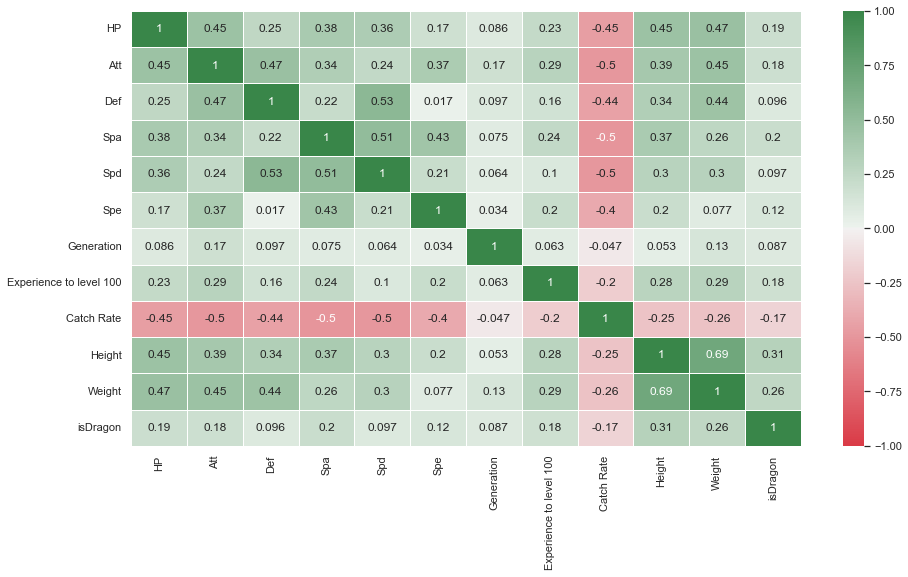

In [11]:
# calculate the correlation matrix
corr_matrix = training_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

From the correlation matrix above, the features with the highest correlation with isDragon are:
    
- Height (r = 0.31)
- Weight (r = 0.26)
- Spa (r = 0.20)
- HP (r = 0.19)
- Att (r = 0.18)
- Experience to level 100 (r = 0.18)
- Catch Rate (r = -0.17)

The features that are most correlated with each other seem to be:

- Height + Weight (r = 0.69)
- Spd + Def (r = 0.53)
- Spd + Spa (r = 0.51)
- Catch Rate + Spa (r = -0.50)
- Catch Rate + Spd (r = -0.50)

### Distributions

array([[<AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'Att'}>,
        <AxesSubplot:title={'center':'Def'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'Spd'}>,
        <AxesSubplot:title={'center':'Spe'}>],
       [<AxesSubplot:title={'center':'Generation'}>,
        <AxesSubplot:title={'center':'Experience to level 100'}>,
        <AxesSubplot:title={'center':'Catch Rate'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'isDragon'}>]], dtype=object)

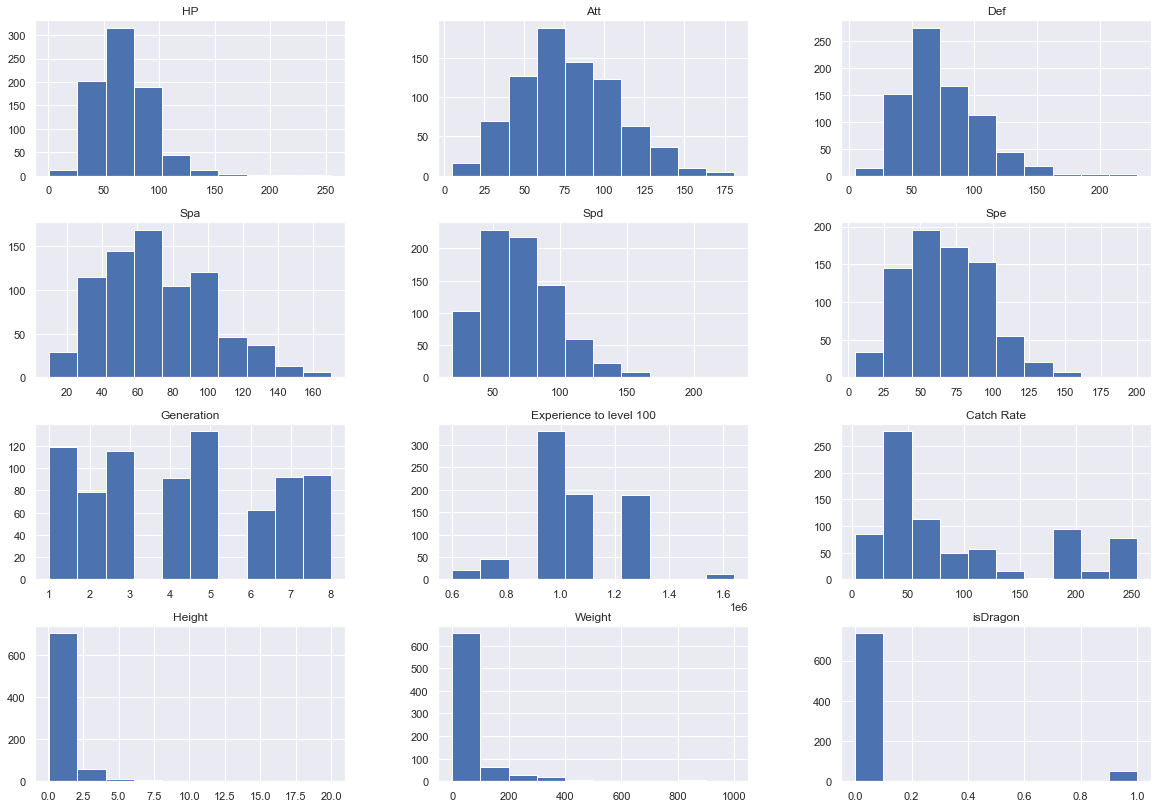

In [104]:
training_set.hist(figsize=(20,14))

From the histograms above, it seems most of the main stats are close to a Guassian distribution if not slightly skewed.

Since these features are on different units of measurement, it would be best to conduct feature scaling.

### Pairplot - Main Stats

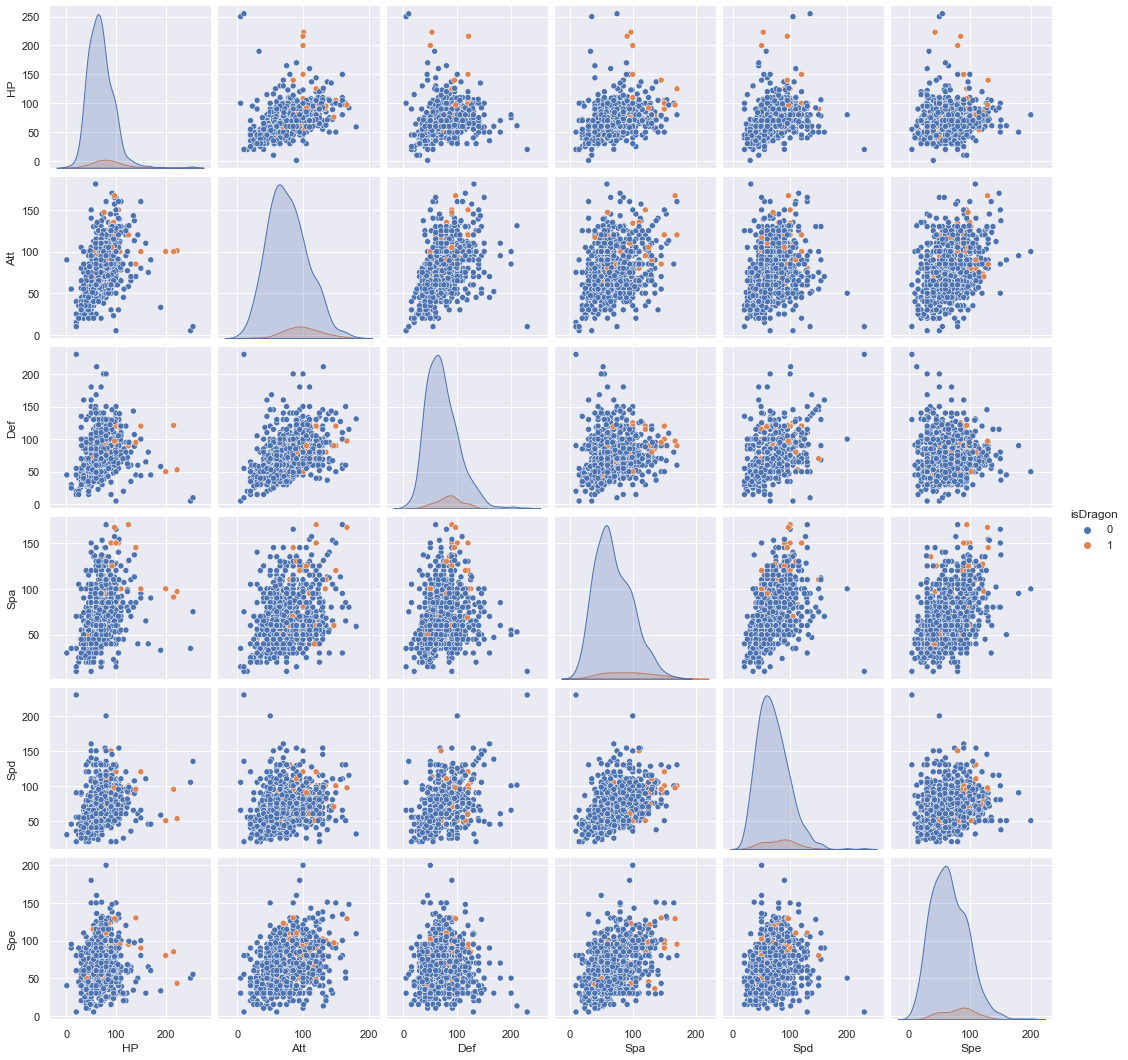

In [106]:
features = ["HP", "Att", "Def", 
              "Spa", "Spd", "Spe",
              "isDragon"]

sns.pairplot(training_set[features],
            hue="isDragon")

With the colored pairplot above, it seems Dragon type Pokemon generally have higher stats than their peers.

### Pairplot - Other Correlations

Aside from the main stats I'd also like to investigate the other highest correlations with isDragon:

- Height (r = 0.31)
- Weight (r = 0.26)
- Experience to level 100 (r = 0.18)
- Catch Rate (r = -0.17)

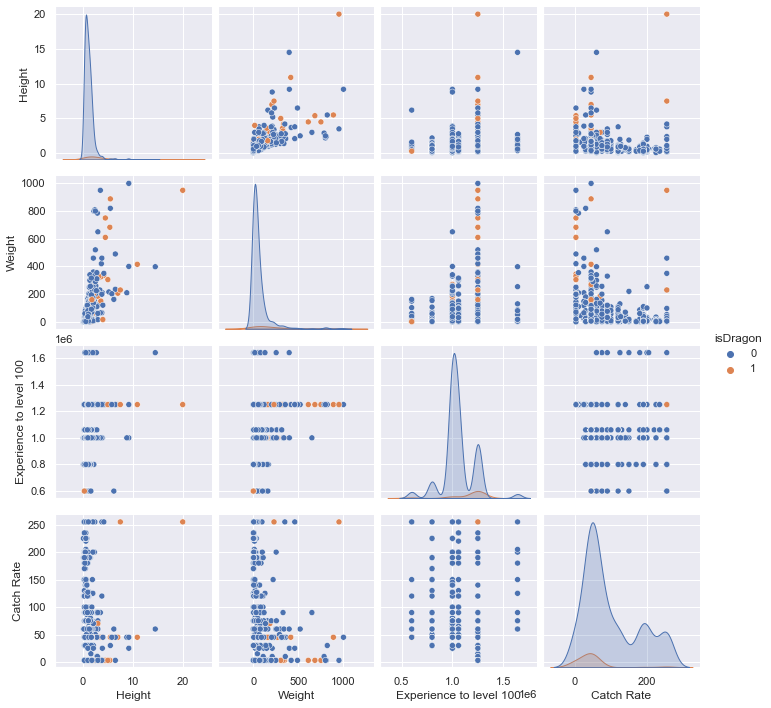

In [107]:
features = ["Height", "Weight", 
            "Experience to level 100", 
            "Catch Rate", "isDragon"]

sns.pairplot(training_set[features],
            hue="isDragon")

With the pairplot above, it seems:

- Dragons have slightly higher height values.
- They have slightly higher weight values.
- Their "Experience to level 100" is on the higher end.
- The catch rate for Dragon types are more on the lower end.

---

## Step 3: Prepare the Data

### One-Hot Encode Categorical Features

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 848 to 316
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP                       785 non-null    int64  
 1   Att                      785 non-null    int64  
 2   Def                      785 non-null    int64  
 3   Spa                      785 non-null    int64  
 4   Spd                      785 non-null    int64  
 5   Spe                      785 non-null    int64  
 6   Generation               785 non-null    float64
 7   Experience type          785 non-null    object 
 8   Experience to level 100  785 non-null    int64  
 9   Catch Rate               785 non-null    int64  
 10  Height                   785 non-null    float64
 11  Weight                   785 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 95.9+ KB


In [12]:
# One hot encode categorical features for the X_train and X_test sets

X_train = pd.get_dummies(X_train, columns=['Generation','Experience type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Generation','Experience type'], drop_first=True)

X_train.head()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,...,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
848,35,75,30,30,30,65,1000000,255,0.3,1.2,...,0,0,0,1,0,0,0,1,0,0
793,53,54,53,37,46,45,1000000,190,0.4,3.5,...,0,0,1,0,0,0,0,1,0,0
799,50,53,62,58,63,44,1250000,225,0.5,8.3,...,0,0,1,0,0,0,0,0,0,1
1029,100,80,80,80,80,80,1250000,3,1.1,7.7,...,0,0,0,0,1,0,0,0,0,1
238,55,45,45,25,25,15,1000000,255,0.4,8.5,...,0,0,0,0,0,0,0,1,0,0


### Check which features are continuous

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 848 to 316
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HP                           785 non-null    int64  
 1   Att                          785 non-null    int64  
 2   Def                          785 non-null    int64  
 3   Spa                          785 non-null    int64  
 4   Spd                          785 non-null    int64  
 5   Spe                          785 non-null    int64  
 6   Experience to level 100      785 non-null    int64  
 7   Catch Rate                   785 non-null    int64  
 8   Height                       785 non-null    float64
 9   Weight                       785 non-null    float64
 10  Generation_2.0               785 non-null    uint8  
 11  Generation_3.0               785 non-null    uint8  
 12  Generation_4.0               785 non-null    uint8  
 13  Generation_5.0    

**Notes for Self:**
    
*Normalization or Min-Max Scaling* 
- The process of scaling data into a range of 0 - 1. 
- It's more useful and common for regression tasks.
- Useful when there are no outliers as it cannot cope up with them. 
- Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.
- It is really affected by outliers.

*Standardization or Z-Score Normalization*
- The process of scaling data so that they have a mean value of 0 and a standard deviation of 1. 
- (Converts to Z-scores where they're units of standard deviation from the mean.)
- It's more useful and common for classification tasks. 
- It is much less affected by outliers.

Sources: 
https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/
https://www.geeksforgeeks.org/normalization-vs-standardization/

### Feature Scaling on Continuous Features with Standardization

In [13]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a function to scale the train and test sets

def scaleCategoricalFeatures(X_data):
    

    # Select features to scale
    features = ["HP", "Att", "Def", "Spa", "Spd", "Spe", 
                "Experience to level 100", "Catch Rate", "Height", "Weight"]
    
    scaler = StandardScaler()

    X_data[features] = scaler.fit_transform(X_data[features])
    
    return X_data

X_train = scaleCategoricalFeatures(X_train)
X_test = scaleCategoricalFeatures(X_test)

print(X_train.shape)

(785, 22)


In [14]:
# see all columns
pd.set_option('display.max_columns', None)

X_train.head()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,Generation_2.0,Generation_3.0,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
848,-1.271922,-0.098940,-1.429348,-1.354220,-1.484545,-0.073716,-0.394623,2.076667,-0.688726,-0.536035,0,0,0,0,0,1,0,0,0,1,0,0
793,-0.617624,-0.782806,-0.668465,-1.123607,-0.902952,-0.757724,-0.394623,1.229812,-0.616379,-0.517593,0,0,0,0,1,0,0,0,0,1,0,0
799,-0.726674,-0.815371,-0.370728,-0.431766,-0.285009,-0.791924,1.211668,1.685811,-0.544032,-0.479105,0,0,0,0,1,0,0,0,0,0,0,1
1029,1.090821,0.063886,0.224746,0.293020,0.332934,0.439290,1.211668,-1.206526,-0.109949,-0.483916,0,0,0,0,0,0,1,0,0,0,0,1
238,-0.544924,-1.075891,-0.933120,-1.518944,-1.666293,-1.783736,-0.394623,2.076667,-0.616379,-0.477502,1,0,0,0,0,0,0,0,0,1,0,0


### Make sure it worked by seeing if Standard Deviations are 1

In [113]:
X_train.describe()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,Generation_2.0,Generation_3.0,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
count,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,1.922445e-16,-6.548194e-17,-3.537510e-17,2.045780e-16,-1.651899e-16,-1.880308e-16,1.055065e-16,-1.209224e-16,-1.368332e-16,-3.288240e-17,0.100637,0.146497,0.115924,0.169427,0.078981,0.117197,0.119745,0.058599,0.014013,0.420382,0.242038,0.239490
std,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,0.301039,0.353829,0.320337,0.375368,0.269881,0.321860,0.324870,0.235022,0.117618,0.493935,0.428590,0.427045
min,-2.507819e+00,-2.378494e+00,-2.256396e+00,-2.013116e+00,-1.848041e+00,-2.125740e+00,-2.964688e+00,-1.206526e+00,-8.334202e-01,-5.448546e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.266739e-01,-7.502408e-01,-7.677105e-01,-6.953242e-01,-7.575533e-01,-7.577240e-01,-3.946228e-01,-6.593273e-01,-5.440318e-01,-4.783036e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.087256e-01,-9.893969e-02,-1.060728e-01,-2.011522e-01,-1.396102e-01,-7.371602e-02,-3.946228e-01,-4.638992e-01,-1.822963e-01,-3.171377e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.455727e-01,7.151867e-01,5.555650e-01,6.883576e-01,6.600808e-01,7.812939e-01,1.211668e+00,5.783844e-01,1.794392e-01,2.523946e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.725056e+00,3.352956e+00,5.187029e+00,3.258052e+00,5.785373e+00,4.543338e+00,3.717481e+00,2.076667e+00,1.356365e+01,7.471743e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 848 to 316
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HP                           785 non-null    float64
 1   Att                          785 non-null    float64
 2   Def                          785 non-null    float64
 3   Spa                          785 non-null    float64
 4   Spd                          785 non-null    float64
 5   Spe                          785 non-null    float64
 6   Experience to level 100      785 non-null    float64
 7   Catch Rate                   785 non-null    float64
 8   Height                       785 non-null    float64
 9   Weight                       785 non-null    float64
 10  Generation_2.0               785 non-null    uint8  
 11  Generation_3.0               785 non-null    uint8  
 12  Generation_4.0               785 non-null    uint8  
 13  Generation_5.0    

---

## Step 4: Principal Component Analysis
    
- Feature selection and exploration 

### Conduct PCA for 95% variance

In [15]:
from sklearn.decomposition import PCA

# create instance of PCA with enough features to capture 95% of the variance
pca = PCA(n_components=0.95,
         random_state=42)

# fit PCA model to the scaled data
pca.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.36352435 0.11451153 0.10072787 0.07322482 0.06730468 0.05823753
 0.03731313 0.03478141 0.02530933 0.02350666 0.02075923 0.01498828
 0.01267715 0.01126735]


The first component accounts for about 36% of the variance.

The first two components account for about 48% of the variance.

The first three components account for about 58% of the variance.

For 95% variance, PCA has reduced the 22 features down to 14.

### Components Heatmap

Text(0, 0.5, 'Principal components')

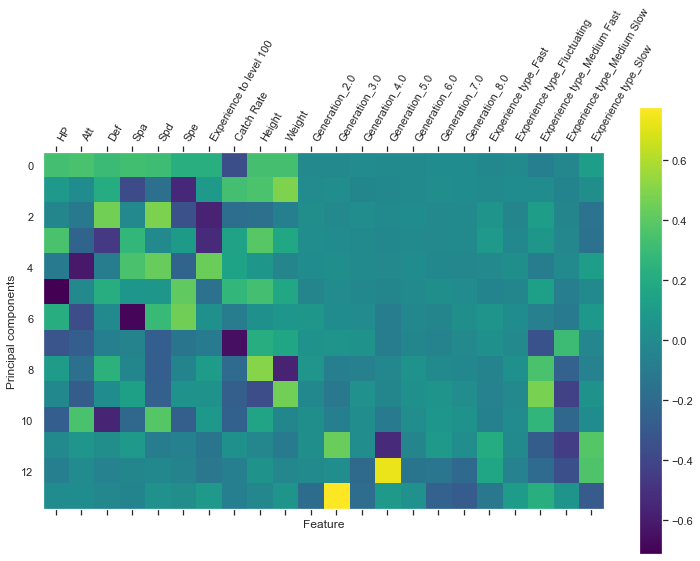

In [16]:
plt.matshow(pca.components_, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')

# hide overlappint gridlines
plt.grid(b=None)

plt.xlabel("Feature")
plt.ylabel("Principal components")

For the first component, the more extreme features with opposite signs are:
- Postive: The six main stats, Experience to level 100, Height, Weight
- Negative: Catch Rates

Along the "axis" of the first component, the stronger, bigger, and the more effort it takes to train the Pokemon, the harder it is to catch.

---

For the second component, the more extreme features with opposite signs are:
- Positive: Weight, Height, Catch Rate, Defence, and HP
- Negative: Spa, Spd, Spe

Along the "axis" of the second component, the bigger and bulkier a Pokemon's stats, the slower and less "Special" stats they would have. And the smaller and more prone to damage a Pokemon is, the faster and higher "Special" stats they would have".

### Create a PCA train and test sets

- Models will be trained on both for comparisons

In [17]:
# Transform X_sets with PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(785, 14)
(197, 14)


---

## Step 5: Gradient Boosted Decision Tree

The first algorithm I am using is Gradient Boosted Decision Trees.

They are useful for their feature importance scores. It's helpful for feature selection.

They also might be better than random forests because each "tree" iteration is used to "fix" a previous trees errors.

### Gradient Boosted Decision Trees+ Cross Validation Scores

In [18]:
# Create instances of Gradient Boosted Decision Tree --------------------
from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)


# Fit both instances ----------------------------------------------------

boosted_tree.fit(X_train, y_train)
boosted_tree_pca.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(boosted_tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(boosted_tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9299363057324841

Mean of cv_scores (with pca): 0.932484076433121


It seems with PCA, performance on the training set has slightly increased.

### Visualize Feature Importance

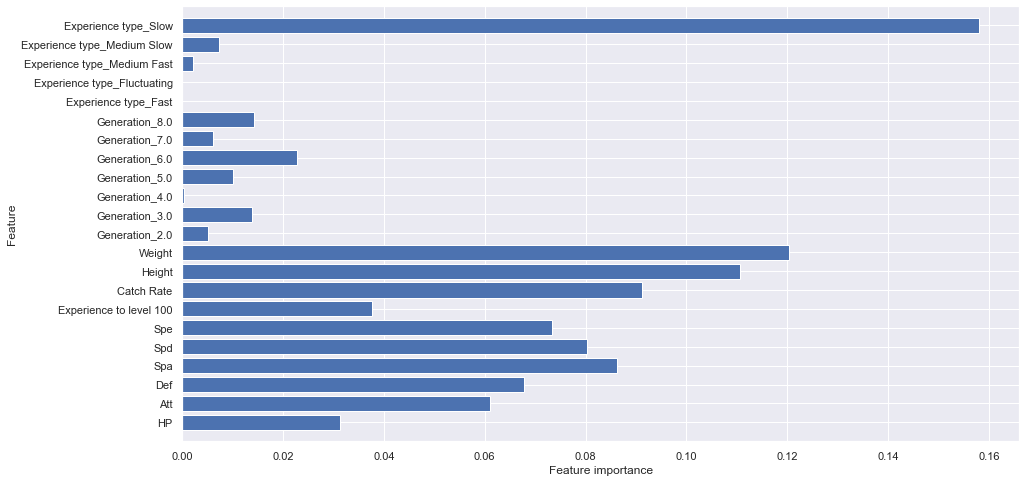

In [19]:
def plot_feature_importances(model, X_data, isPCA):
    
    n_features = X_data.shape[1]
    
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    if not isPCA:
        plt.yticks(np.arange(n_features), X_data.columns)
    
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model = boosted_tree, 
                         X_data = X_train, 
                         isPCA = False)

According to the Gradient Boosted Decision Tree, "Generation" is not very important when predicting isDragon.

And it seems the only experience type that is important for predicting isDragon is "Slow," which is also the most important.

### Remove the features that have the lowest feature importance

- Less importance may mean the features are just adding noise, so removing them may increase performance.

In [20]:
# Remove unwanted features and unwanted components

features_to_drop = ["Experience type_Medium Slow", "Experience type_Medium Fast",
                    "Experience type_Fluctuating", "Experience type_Fast",
                    "Generation_7.0", "Generation_5.0",
                    "Generation_4.0", "Generation_2.0"]

X_train = X_train.drop(features_to_drop, axis=1)
X_test = X_test.drop(features_to_drop, axis=1)

print(X_train.shape)
print(X_test.shape)

(785, 14)
(197, 14)


### Run PCA on Reduced Features

In [22]:
from sklearn.decomposition import PCA

# create instance of PCA with enough features to capture 95% of the variance
pca = PCA(n_components=0.95,
         random_state=42)

# fit PCA model to the scaled data
pca.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.39361012 0.12435427 0.10785925 0.07873411 0.07274921 0.06233144
 0.03977139 0.03477839 0.02673412 0.02307319]


### Heatmap of New Components

Text(0, 0.5, 'Principal components')

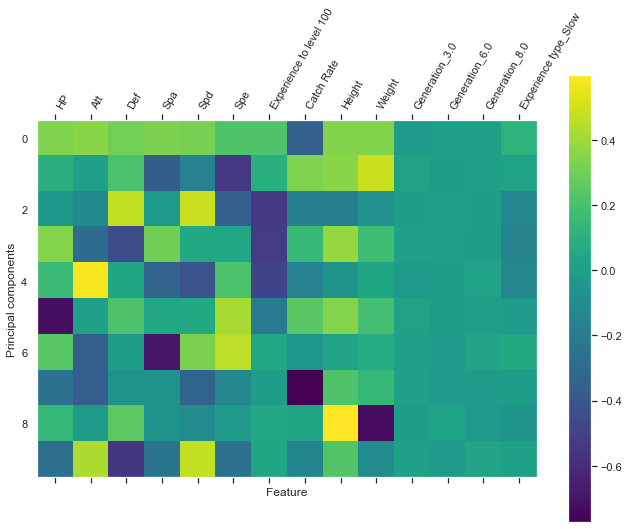

In [24]:
plt.matshow(pca.components_, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')

# hide overlappint gridlines
plt.grid(b=None)

plt.xlabel("Feature")
plt.ylabel("Principal components")

### Create new PCA Train Test Sets

In [25]:
# Transform X_sets with PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(785, 10)
(197, 10)


### Refit the Gradient Boosted Decision Trees (With the reduced features)


In [26]:
# Create instances of Gradient Boosted Decision Tree --------------------
from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)


# Fit both instances ----------------------------------------------------

boosted_tree.fit(X_train, y_train)
boosted_tree_pca.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(boosted_tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(boosted_tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9312101910828027

Mean of cv_scores (with pca): 0.9299363057324841


It seems with reduced features, the performance is generally the same, so the removed features did not contribute much to the model.

---

## Step 6: Decision Tree

In [27]:
# Create instances of Decision Trees --------------------

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree_pca = DecisionTreeClassifier(random_state=42)



# Fit both instances ----------------------------------------------------

tree.fit(X_train, y_train)
tree_pca.fit(X_train_pca, y_train)



# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9031847133757962

Mean of cv_scores (with pca): 0.9095541401273884


It seems Decision Tree does fairly well with slightly reduced performance.